# Airbnb In Seattle - Location matters!

When it comes to real estate, location is one of the major keys to making or losing money. These basic rules of real estate market also apply for Airbnb accomodation offering as the example of data from Seattle shows. An analysis interesting (not only) for Airbnb host.<br>

There might be hope for a price battle in neighbourhoods with lots of objects listed or available, but the dominant factor for higher prices is the region.s In case the object is already there to be listed in Airbnb, you might think of offering amenities to justify a slightly higher price, but you cannot break the boundaries set by the location of your object. <br>

How comes? The following analysis focussing on these three questions will provide a deeper insight in Airbnb data provided for the City of Seattle. The questions are <br>

- What ist the mean price range per Airbnb listing in Seattle neighbourhoods?
- Back to the roots - How much do you pay per bed in neighbourhoods?
- High price neighbourhoods - do they have a significant availabilty compared to other neighbourhoods?
- High and low price neighbourhoods - Are there major differences in amenities offered?


## 1. Prepare environment and get data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# base color setting for chart color setting
base_color='blue'

In [3]:
# no warnings on warnings deprecated functions in future
pd.set_option("future.no_silent_downcasting", True)

### 1.1 Data load

For Seattle, there are 3 files provided by airbnb availble at Kaggle. You can find the files [here](https://www.kaggle.com/datasets/airbnb/seattle).
<br>
- listings.csv  A list of locations along with additional information
- calendar.csv  A booking calendar with availability and pricing data
- reviews.csv  A list of reviews on bookings on the locations


In [4]:
df_listings = pd.read_csv("listings.csv")
df_calendar = pd.read_csv("calendar.csv")
df_reviews = pd.read_csv("reviews.csv")

## 2 Data inspection

First, we take a closer look at the raw data loaded. The focus is on the shape of data, the features available and missing data. This prepares the subselection and cleaning to data in the next step

### 2.1 Listings

In [5]:
# a first visual impression of the data
df_listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1343,8487843,https://www.airbnb.com/rooms/8487843,20160104002432,2016-01-04,A Quiet Retreat in the City Center!,"In Seattle for fun? The Pike Place Market, Spa...",We call this lovely flat Swallow's Rest. It's ...,"In Seattle for fun? The Pike Place Market, Spa...",none,Swallow's Rest is in a pretty perfect location...,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,2,4.00
2785,4652918,https://www.airbnb.com/rooms/4652918,20160104002432,2016-01-04,Io House (Pvt Twin) - SLU Walkable,"Capitol Hill's Io House is built, run and supp...",Whether you're visiting Seattle for a Codefell...,"Capitol Hill's Io House is built, run and supp...",none,Capitol Hill is the cultural and nightlife cen...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,37,0.14
1915,6438013,https://www.airbnb.com/rooms/6438013,20160104002432,2016-01-04,Seattle Modern Loft,Seattle Modern Loft is beautifully designed wi...,The space is amazing value for every guest and...,Seattle Modern Loft is beautifully designed wi...,none,Great neighborhood (Interbay) sits right out s...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,3.00
2251,7411863,https://www.airbnb.com/rooms/7411863,20160104002432,2016-01-04,Room E Single Bed in the conner,Single Bed in the conner of laundry room Clea...,This Single Bed is in the conner of laundry room.,Single Bed in the conner of laundry room Clea...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,7.74
1856,6759046,https://www.airbnb.com/rooms/6759046,20160104002432,2016-01-04,West Seattle private entrance/suite,Basement suite w/separate entrance. One bedroo...,Our home is prefect for a quick visit to West ...,Basement suite w/separate entrance. One bedroo...,none,"West seattle Brewery, Rudys barbershop, Trader...",...,8.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.46


In [6]:
# check the shape 
df_listings.shape

(3818, 92)

There are 3818 listings availble. with up to 92 features describing each listing. The visual inspection shows that we have different content in the rows, from ids, strings up to number or missing values. <br><br>
Time to take a closer look at the 92 features by creating a list of the names:

In [7]:
# get a list of column names
lst_listing_cols = df_listings.columns.to_list()
lst_listing_cols

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


Although there are several features, a look on the list shows feature clusters like data on the host, the location or features of the location. This hepls selecting the right data for the focus of this analysis.<br> <br>
With dynamic type assignment of python, taking a look at data types is relevant for further processing

In [8]:
df_listings['city'].unique()

array(['Seattle', 'Ballard, Seattle', 'West Seattle', 'Seattle ', '西雅图',
       'Phinney Ridge Seattle', 'seattle'], dtype=object)

A short check shows that even the asian writing refers to Seattle. 

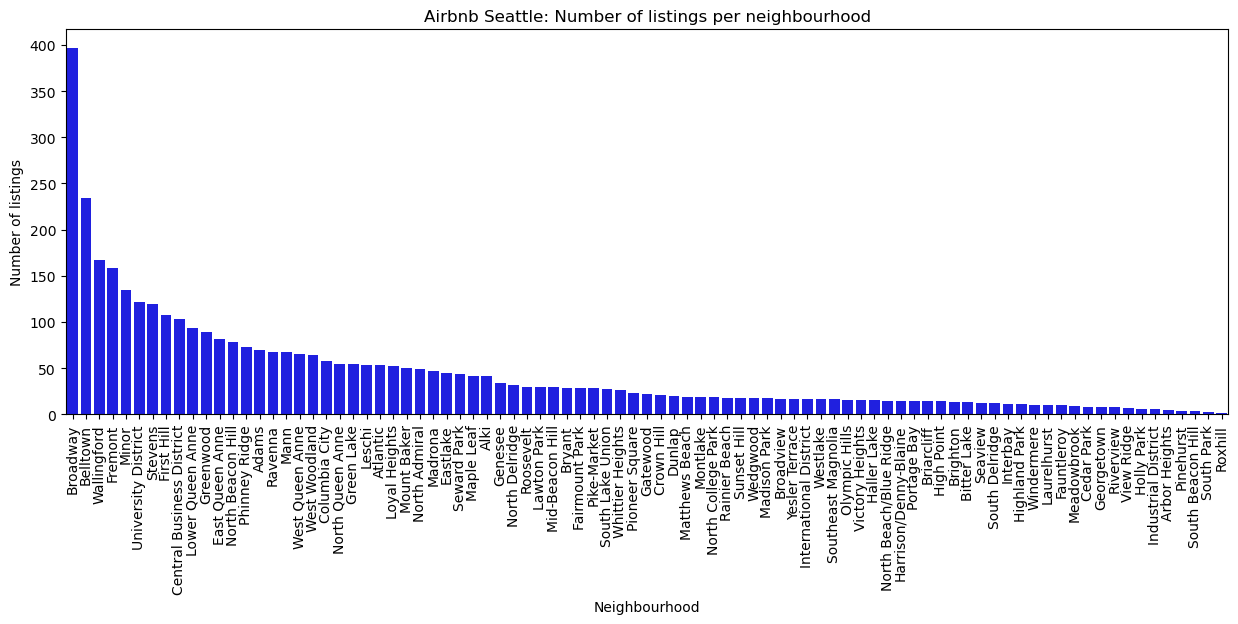

In [9]:
# a closer look at the number of listings per neighbourhood

plt.figure(figsize=[15,5])
ax_neigh=sns.countplot(data=df_listings, x='neighbourhood_cleansed', 
                       order = df_listings['neighbourhood_cleansed'].value_counts().index, 
                       color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings')
plt.title('Airbnb Seattle: Number of listings per neighbourhood')
plt.savefig('listings_raw.png', bbox_inches='tight');

A check on the bed information given

In [10]:
df_listings['beds'].unique()

array([ 1.,  7.,  2.,  3., 15.,  5.,  4.,  6.,  9.,  8., nan, 10.])

In [11]:
df_listings[df_listings['beds'].isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1961,609252,https://www.airbnb.com/rooms/609252,20160104002432,2016-01-04,Sans souci in Seattle,NaN,"In the Pacific Northwest's Emerald City, treat...","In the Pacific Northwest's Emerald City, treat...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,2,NaN


The information on the number of beds available is nearly complete, only one listings does not provide the data

Check for object types and amenities for a later analysis on these items

In [12]:
df_property = df_listings[['id','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities',
                       'price','neighbourhood_cleansed']]

In [13]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   property_type           3817 non-null   object 
 2   room_type               3818 non-null   object 
 3   accommodates            3818 non-null   int64  
 4   bathrooms               3802 non-null   float64
 5   bedrooms                3812 non-null   float64
 6   beds                    3817 non-null   float64
 7   bed_type                3818 non-null   object 
 8   amenities               3818 non-null   object 
 9   price                   3818 non-null   object 
 10  neighbourhood_cleansed  3818 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 328.2+ KB


In [14]:
df_property.head(5)

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,neighbourhood_cleansed
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,West Queen Anne
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,West Queen Anne
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,West Queen Anne
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,West Queen Anne
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,West Queen Anne


Besides some missing data in bed- and bathrooms, the most eye-catching findings are the amenities covered in one column only and the price column along with the currency symbol. 

### 2.2 Calendar 

In [15]:
# first view on data
df_calendar.sample(5)

,listing_id,date,available,price
46848,7604621,2016-05-11,f,NaN
955729,1768883,2016-06-11,f,NaN
1243035,4130102,2016-08-01,f,NaN
549018,9516114,2016-03-02,f,NaN
348253,3490239,2016-02-16,t,$150.00


In [16]:
df_calendar.shape

(1393570, 4)

As "listing_id" seems to establish the link to the listings. To validate this, the number of unique elements of both dataframes should have high overlappings:

In [17]:
# check number of unique ids in both dataframes
df_listings['id'].nunique(), df_calendar['listing_id'].nunique()

(3818, 3818)

In [18]:
# get unique values of id columns as list and match sets
len(set(df_listings['id'].unique().tolist()) & set(df_calendar['listing_id'].unique().tolist()))

3818

With an identical number of unique values, the link between data of both dataframes is validated. As calendar has 4 columns only, a further inspection of columns is not necessary, as all names can be seen in the initial visual inspection. <br><br>
Time for data types and missing values

In [19]:
# check for initial data types
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [20]:
# check for missing values
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [21]:
# check if prices are set for available days only
df_calendar.groupby(by=['available']).count()

,listing_id,date,price
available,,,
f,459028,459028,0
t,934542,934542,934542


Major findings:
- date column set as string, change to date format
- available column should be set to boolean
- price column is string, numbers with $ - prefix, change to numeric value

### 2.3 Reviews

In [22]:
# first view on data
df_reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
80127,365550,12261786,2014-04-27,14596662,Jasmine,The loft was wonderful and private. Had a grea...
40046,1163345,11372033,2014-03-31,10020294,Jessica,I recently traveled to Seattle to attend Emera...
15279,9460,306256,2011-06-10,330330,Laura,Not only was this place in a perfect location ...
23608,1820794,35060214,2015-06-15,26136181,Cindy,This was our first Airbnb experience and we we...
52035,1818768,15969554,2014-07-19,17107323,Tali,"Daniel and Lizzy are super nice, They are grea..."


In [23]:
df_reviews.shape

(84849, 6)

In [24]:
# check number of unique ids in both dataframes
df_listings['id'].nunique(), df_reviews['listing_id'].nunique()

(3818, 3191)

In [25]:
# get unique values of id columns as list and match sets
len(set(df_listings['id'].unique().tolist()) & set(df_reviews['listing_id'].unique().tolist()))

3191

The number of listing elements having at least one review is smaller than the total number of listed objects. As all listings elements reviewed are contained in listing dataframe, we have a few listed object with no reviews in data. Joining both dataframes with "id" and "listing_id" is vaild.

In [26]:
# check for data type settings after import
df_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [27]:
# general overview on columns
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


The reviews data does not contian information that will be used to answer questions above focussing the general market structure of Airbnb in Seattle. When it comes to adding the customer requests to the market offers in a potential second step of this analysis, this data will provied useful input.

## 3. Data cleaning

General functions for cleaning jobs

In [28]:
def price_col_separator(df_raw, col_name):
    'separates price and currency to separate columns and deletes column given'
    
    df_raw_cp = df_raw.copy()
    
    # split price in columns for currency and value
    df_raw_cp['currency'] = df_raw_cp[col_name].str[:1]
    df_raw_cp['price_value'] = df_raw_cp[col_name].str[1:]
    
    # replace NaN values
    df_raw_cp[['price_value']] = df_raw_cp[['price_value']].fillna(value=0)
    df_raw_cp[['currency']] = df_raw_cp[['currency']].fillna(value="-")
    
    # remove commas in price_value strings and change dtype to float
    df_raw_cp['price_value'] = df_raw_cp['price_value'].replace(",","", regex=True)
    df_raw_cp['price_value'] = df_raw_cp['price_value'].astype(float)
    
    # drop orignial price column
    df_raw_cp.drop(['price'],axis=1, inplace=True)
    
    return(df_raw_cp)

#### 3.1 Listings

For listings, the following dataframes will be extracted from the original dataframe df_listing and cleaned for further usage:<br><br>
<b>df_listing_neigh</b><br>
A short dataframe containing the listings id as reference and the neighbourhood cleaned information<br>

<b>df_price_neigh</b><br>
The id and cleaned neighbourhood along with cleaned pricing information<br>

<b>df_bed</b><br>
A dataframe with number of beds, neighbourhoods and pricing information<br>

<b>df_amen_neigh</b><br>
A dataframe with expanded amenities in an one-hot encoding style along with neighbourhood information


##### df_listing_neigh preparation

In [29]:
# cut out neighborhood information from listings
df_listing_neigh = df_listings[['id','neighbourhood_cleansed']]

In [30]:
# check data cut for issues
df_listing_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      3818 non-null   int64 
 1   neighbourhood_cleansed  3818 non-null   object
dtypes: int64(1), object(1)
memory usage: 59.8+ KB


In [31]:
df_listing_neigh['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

The "neighbourhood_cleansed" column shows no further issues, so it can be taken as it is.

##### df_price_neigh preparation

In [32]:
df_price_neigh = df_listings[['id','neighbourhood_cleansed','price']]
df_price_neigh

,id,neighbourhood_cleansed,price
0,241032,West Queen Anne,$85.00
1,953595,West Queen Anne,$150.00
2,3308979,West Queen Anne,$975.00
3,7421966,West Queen Anne,$100.00
4,278830,West Queen Anne,$450.00
...,...,...,...
3813,8101950,Fremont,$359.00
3814,8902327,Portage Bay,$79.00
3815,10267360,Rainier Beach,$93.00
3816,9604740,Madison Park,$99.00


In [33]:
df_price_neigh = price_col_separator(df_price_neigh,"price")

In [34]:
df_price_neigh

,id,neighbourhood_cleansed,currency,price_value
0,241032,West Queen Anne,$,85.0
1,953595,West Queen Anne,$,150.0
2,3308979,West Queen Anne,$,975.0
3,7421966,West Queen Anne,$,100.0
4,278830,West Queen Anne,$,450.0
...,...,...,...,...
3813,8101950,Fremont,$,359.0
3814,8902327,Portage Bay,$,79.0
3815,10267360,Rainier Beach,$,93.0
3816,9604740,Madison Park,$,99.0


In [35]:
df_price_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   neighbourhood_cleansed  3818 non-null   object 
 2   currency                3818 non-null   object 
 3   price_value             3818 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 119.4+ KB


##### df_bed preparation

In [36]:
# a subset of relevant data for price per bed analysis
df_bed = df_listings[['id','neighbourhood_cleansed', 'beds', 'price']]

In [37]:
df_bed[df_bed['beds'].isna()]

,id,neighbourhood_cleansed,beds,price
1961,609252,Greenwood,NaN,$280.00


As only one value is missing, dropping this line might be an option. To keep the listings object, the mean number of beds for the room type is used as fill up value. This keeps the listing in the later analytics

In [38]:
# check for room type of missing beds listing
df_listings.iloc[1961][['id','neighbourhood_cleansed', 'room_type','beds']]

id                              609252
neighbourhood_cleansed       Greenwood
room_type                 Private room
beds                               NaN
Name: 1961, dtype: object

In [39]:
# with the requested values above, the room type is a private room. So filling up the number of beds will be the mean value of 
# beds for this room type, rounded to a value without decimals:
df_bed.at[1961,'beds'] = round(df_listings[df_listings['room_type'] == "Private room"]['beds'].mean(),0)

In [40]:
df_bed[df_bed['beds'].isna()]

,id,neighbourhood_cleansed,beds,price


In [41]:
df_bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   neighbourhood_cleansed  3818 non-null   object 
 2   beds                    3818 non-null   float64
 3   price                   3818 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 119.4+ KB


In [42]:
# the price column needs cleaning
df_bed = price_col_separator(df_bed,'price')

In [43]:
df_bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   neighbourhood_cleansed  3818 non-null   object 
 2   beds                    3818 non-null   float64
 3   currency                3818 non-null   object 
 4   price_value             3818 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 149.3+ KB


##### Amenities cleaning

In [44]:
def split_amenities(df_properties, amen_col):
    'splits amenities column in dataframe in separate columns and cleans strings and return expanded dataframe with cleaned strings'

    # get amenities string an split based on comma value
    # empty values in target dataframe will be filled with hyphen
    df_amen_exp = df_properties[amen_col].str.split(pat=",",expand=True)
    df_amen_exp.fillna("-", inplace=True)

    # remove unwanted characters in amenities values 
    df_amen_exp = df_amen_exp.map(lambda x: x.lstrip('"{').rstrip('"}'))

    return(df_amen_exp)

In [45]:
def one_zero_amenities(df_amen):
    'sets a one / zero dataframe for amenities per listing and returns this dataframe'
    'listing objects with no amenities will be deleted, as this function prepares for a regression algorithm'

    # get a set of all amenities existing in dataframe columns
    uni_set = set()
    for col in df_amen.columns:
        uni_set.update(df_amen[col].unique().tolist())
    # remove hyphen and blank value from set
    uni_set.remove("-")
    uni_set.remove("")
    # add a column to take ove the index of the dataframe listing
    uni_set.add("listings_idx")

    # setup dataframe with unique amenities as columns
    df_result = pd.DataFrame(columns=list(uni_set),dtype=int)

    # get each listing, pick the amenities and set accoring dataframe column to 1 
    # objects with no amenities will be deleted by detecting "" in amenities string
    for listing_no in df_amen.index:
        obj = df_amen.iloc[listing_no].unique().tolist()
        if "-" in obj:
            obj.remove('-')
        if "" in obj:
            obj.remove('')
        for accom in obj:
            df_result.at[listing_no,accom]=1
        # add index of initial dataframe to current row
        df_result.at[listing_no,'listings_idx'] = listing_no

    # use index of initial dataframe for result dataframe to allow easy merging
    df_result = df_result.set_index('listings_idx')
    
    # all values not set to 1 will be filled with 0
    df_result = df_result.fillna(0)

    # change datatypes to int
    df_result = df_result.astype(int)

    return(df_result)

In [46]:
# get dataframe with amenities per neighbourhood
df_amenities = df_listings[['id','amenities','neighbourhood_cleansed']].copy()

In [47]:
# prepare a dataframe with focus on amenities per listing id for splitting the amenities
df_split_amen = df_amenities[['id','amenities']].copy()

In [48]:
# split the amenities to an expanded dataframe
df_split_amen = split_amenities(df_split_amen, 'amenities')

In [49]:
# short visual check on current state of dataframe
df_split_amen.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
360,TV,Internet,Wireless Internet,Kitchen,Heating,Smoke Detector,Carbon Monoxide Detector,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3119,Cable TV,Wireless Internet,Kitchen,Free Parking on Premises,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,...,-,-,-,-,-,-,-,-,-,-
2418,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Smoking Allowed,Pets Allowed,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,...,-,-,-,-,-,-,-,-,-,-


In [50]:
# sum up amenites to a newly built dataframe in a one-hot-encoding style
df_amen_clean = one_zero_amenities(df_split_amen)

In [51]:
# a new short visual check of the results
df_amen_clean.sample(3)

,Cable TV,Gym,Wheelchair Accessible,Indoor Fireplace,Dog(s),Fire Extinguisher,Wireless Internet,Kitchen,Smoke Detector,Hot Tub,...,Essentials,TV,First Aid Kit,Dryer,Buzzer/Wireless Intercom,Carbon Monoxide Detector,Elevator in Building,Laptop Friendly Workspace,Washer,Pool
listings_idx,,,,,,,,,,,,,,,,,,,,,
157.0,0,0,0,1,0,0,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
296.0,1,0,0,0,0,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
1623.0,1,0,0,0,0,1,1,1,1,0,...,1,1,1,0,0,1,1,0,0,0


In [52]:
# bring back neighbourhood information to amenities and drop original column of amenities
df_amen_neigh = pd.merge(df_amenities,df_amen_clean,how='right',left_index=True,right_index=True)
df_amen_neigh.drop(['amenities'], axis=1, inplace=True)


In [53]:
# another short visual check
df_amen_neigh.head(3)

,id,neighbourhood_cleansed,Cable TV,Gym,Wheelchair Accessible,Indoor Fireplace,Dog(s),Fire Extinguisher,Wireless Internet,Kitchen,...,Essentials,TV,First Aid Kit,Dryer,Buzzer/Wireless Intercom,Carbon Monoxide Detector,Elevator in Building,Laptop Friendly Workspace,Washer,Pool
listings_idx,,,,,,,,,,,,,,,,,,,,,
0.0,241032,West Queen Anne,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1.0,953595,West Queen Anne,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,0,0,1,0
2.0,3308979,West Queen Anne,1,0,0,1,1,0,1,1,...,1,1,0,1,0,1,0,0,1,0


### 3.2 Calendar

As calendar is a dataframe with a small number of columns, no extracted dataframes will be created- Besides the data type conversions, the major topic is separating the price column to a currency and price value column. <br>
The result is <b>df_calendar_clean</b>, which contains the cleaning actions mentioned above.

In [54]:
def calendar_cleaner(df_cal_raw):
    'takes raw calendar data from Airbnb and trims data'
    
    df_cal_raw_cp = df_cal_raw.copy()
    
    # change date and available dtypes
    df_cal_raw_cp['date'] = pd.to_datetime(df_cal_raw_cp['date'])
    
    # check if available has string 't' and use result as new bool column
    df_cal_raw_cp['available'] = df_cal_raw_cp['available']=="t"
    
    df_cal_raw_cp = price_col_separator(df_cal_raw_cp,"price")
       
    return(df_cal_raw_cp)

In [55]:
df_calendar_clean = calendar_cleaner(df_calendar)

In [56]:
df_calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   listing_id   1393570 non-null  int64         
 1   date         1393570 non-null  datetime64[ns]
 2   available    1393570 non-null  bool          
 3   currency     1393570 non-null  object        
 4   price_value  1393570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 43.9+ MB


In [57]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## 4 Data analytics

First we take a look at the availabilities of the listings. This combines listings and calendar information. In the second step, we focus on pricing information and, along with availabilites already created, we can seutp the whole pricing analytics in on step. At last, we focus on the amenities.

#### 4.1 Availability ratios per neighbourhood

In [58]:
# detail check on timeline available
min(df_calendar['date']), max(df_calendar['date'])

('2016-01-04', '2017-01-02')

In [59]:
# bring bookings and neighbourhood togehter
df_cal_neigh = df_calendar_clean.merge(df_listing_neigh, left_on='listing_id', right_on='id', how='left')
df_cal_neigh = df_cal_neigh[['id','date','available','neighbourhood_cleansed']]

In [60]:
df_cal_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   id                      1393570 non-null  int64         
 1   date                    1393570 non-null  datetime64[ns]
 2   available               1393570 non-null  bool          
 3   neighbourhood_cleansed  1393570 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 33.2+ MB


In [61]:
# available days per listing object as reference fro ratio
avail_days = len(df_calendar_clean) / len(df_listings)
avail_days

365.0

In [62]:
# listings count per neighbourhood
df_obj_per_neigh = df_listing_neigh.groupby(by=['neighbourhood_cleansed']).count()
df_obj_per_neigh.rename(columns={'id':'number_listings'},inplace=True)
df_obj_per_neigh.sort_values(by='number_listings', ascending=False, inplace=True)
df_obj_per_neigh.reset_index(inplace=True)
df_obj_per_neigh

,neighbourhood_cleansed,number_listings
0,Broadway,397
1,Belltown,234
2,Wallingford,167
3,Fremont,158
4,Minor,135
...,...,...
82,Arbor Heights,5
83,South Beacon Hill,4
84,Pinehurst,4
85,South Park,3


In [63]:
# get top 5 neighbourhoods based on listed objects 
lst_top5_number_obj_neighs = df_obj_per_neigh['neighbourhood_cleansed'][:5].tolist()
lst_top5_number_obj_neighs

['Broadway', 'Belltown', 'Wallingford', 'Fremont', 'Minor']

In [64]:
#available days per neighbourhood
df_neigh_avail = df_cal_neigh.groupby(by=['neighbourhood_cleansed']).sum(numeric_only=True)
df_neigh_avail.drop(['id'],axis=1,inplace=True)
df_neigh_avail

,available
neighbourhood_cleansed,
Adams,15743
Alki,11255
Arbor Heights,1390
Atlantic,11787
Belltown,53320
...,...
West Woodland,16009
Westlake,3792
Whittier Heights,6559


In [65]:
# bring available days and number of listings per neighbourhood together
df_neigh_avail = df_neigh_avail.merge(df_obj_per_neigh, on='neighbourhood_cleansed', how='left')
df_neigh_avail

,neighbourhood_cleansed,available,number_listings
0,Adams,15743,70
1,Alki,11255,42
2,Arbor Heights,1390,5
3,Atlantic,11787,53
4,Belltown,53320,234
...,...,...,...
82,West Woodland,16009,64
83,Westlake,3792,17
84,Whittier Heights,6559,26
85,Windermere,2647,10


In [66]:
# compute available days, setup ratio and bring dataframe to proper format
df_neigh_avail['max_avail'] = df_neigh_avail['number_listings']*avail_days
df_neigh_avail['avail_ratio'] = df_neigh_avail['available'] / df_neigh_avail['max_avail'] *100
df_neigh_avail['avail_ratio'] = df_neigh_avail['avail_ratio'].round(2)
df_neigh_avail.reset_index(inplace=True)
df_neigh_avail.sort_values(by=['avail_ratio'], ascending=False, inplace=True)
df_neigh_avail.reset_index(drop=True, inplace=True)

In [67]:
# check data
df_neigh_avail

,index,neighbourhood_cleansed,available,number_listings,max_avail,avail_ratio
0,31,Holly Park,2128,6,2190.0,97.17
1,66,Roxhill,696,2,730.0,95.34
2,29,High Point,4822,14,5110.0,94.36
3,30,Highland Park,3510,11,4015.0,87.42
4,6,Briarcliff,4422,14,5110.0,86.54
...,...,...,...,...,...,...
82,64,Riverview,1589,8,2920.0,54.42
83,67,Seaview,2291,12,4380.0,52.31
84,51,North Beach/Blue Ridge,2626,14,5110.0,51.39
85,69,South Beacon Hill,733,4,1460.0,50.21


In [68]:
# top 5 neighbourhoods based on availability
lst_top5_neigh_avail = df_neigh_avail['neighbourhood_cleansed'][:5].tolist()
lst_top5_neigh_avail

['Holly Park', 'Roxhill', 'High Point', 'Highland Park', 'Briarcliff']

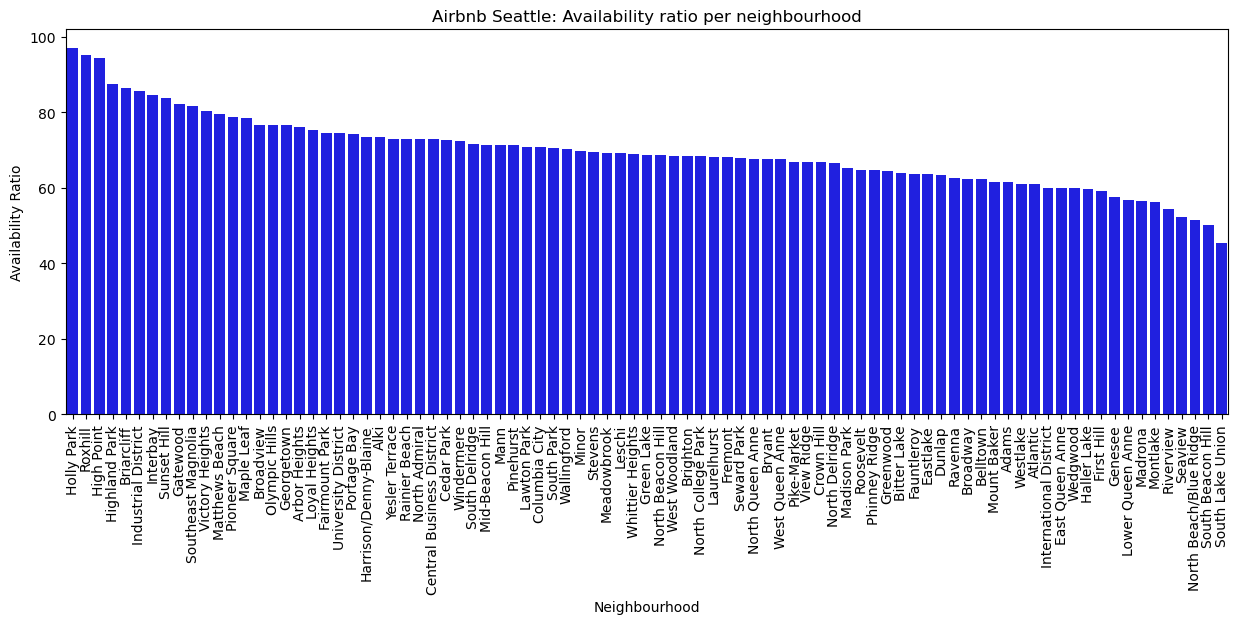

In [69]:
# plot sorted barchart of neighbourhoods with descending ratios
plt.figure(figsize=[15,5])
ax_neigh=sns.barplot(data=df_neigh_avail, x='neighbourhood_cleansed', y='avail_ratio', 
                     color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Availability Ratio')
plt.title('Airbnb Seattle: Availability ratio per neighbourhood')
plt.savefig('availability_ratio_per_neigh.png', bbox_inches='tight');

In [70]:
# check ranking top top 5 neighbourhoods for number of objects listed
df_neigh_avail[df_neigh_avail['neighbourhood_cleansed'].isin(lst_top5_number_obj_neighs)]

,index,neighbourhood_cleansed,available,number_listings,max_avail,avail_ratio
37,79,Wallingford,42800,167,60955.0,70.22
38,47,Minor,34425,135,49275.0,69.86
49,21,Fremont,39319,158,57670.0,68.18
67,9,Broadway,90484,397,144905.0,62.44
68,4,Belltown,53320,234,85410.0,62.43


Result: <br>
The top 5 neighbourhoods based on number of Airbnb objects listed are midfield only based on availability. Despite a high number of objects, chances are good that these neighbourhoods may not fit the travelling plans of users.

#### 4.2 Price level analytics

In [71]:
# relevant input from previous analytics

# top 5 neigbhourhoods based on number of listings
lst_top5_number_obj_neighs

['Broadway', 'Belltown', 'Wallingford', 'Fremont', 'Minor']

In [72]:
# top 5 neighbourhoods based on availability ratio
lst_top5_neigh_avail

['Holly Park', 'Roxhill', 'High Point', 'Highland Park', 'Briarcliff']

In [73]:
# prices per listing and neighbourhood
df_price_neigh.head(5)

,id,neighbourhood_cleansed,currency,price_value
0,241032,West Queen Anne,$,85.0
1,953595,West Queen Anne,$,150.0
2,3308979,West Queen Anne,$,975.0
3,7421966,West Queen Anne,$,100.0
4,278830,West Queen Anne,$,450.0


In [74]:
# group by neighbourhoods and create mean value for prices
df_neigh_mean_prices = df_price_neigh.groupby(by=['neighbourhood_cleansed']).mean(numeric_only =True)
df_neigh_mean_prices['price_value'] = df_neigh_mean_prices['price_value'].round(2)
df_neigh_mean_prices.drop(['id'],axis=1,inplace=True)
df_neigh_mean_prices.reset_index(inplace=True)
df_neigh_mean_prices

,neighbourhood_cleansed,price_value
0,Adams,121.67
1,Alki,171.62
2,Arbor Heights,126.80
3,Atlantic,111.40
4,Belltown,162.89
...,...,...
82,West Woodland,124.34
83,Westlake,194.47
84,Whittier Heights,128.65
85,Windermere,169.90


In [75]:
# order neighbourhoods based on mean prices for a initial ranking
df_neigh_mean_prices.sort_values(by=['price_value'], ascending = False, inplace = True)
df_neigh_mean_prices.reset_index(drop=True, inplace=True)
df_neigh_mean_prices

,neighbourhood_cleansed,price_value
0,Southeast Magnolia,231.71
1,Portage Bay,227.86
2,Westlake,194.47
3,West Queen Anne,187.77
4,Montlake,182.79
...,...,...
82,North Delridge,76.38
83,Georgetown,76.12
84,South Delridge,74.67
85,Olympic Hills,71.69


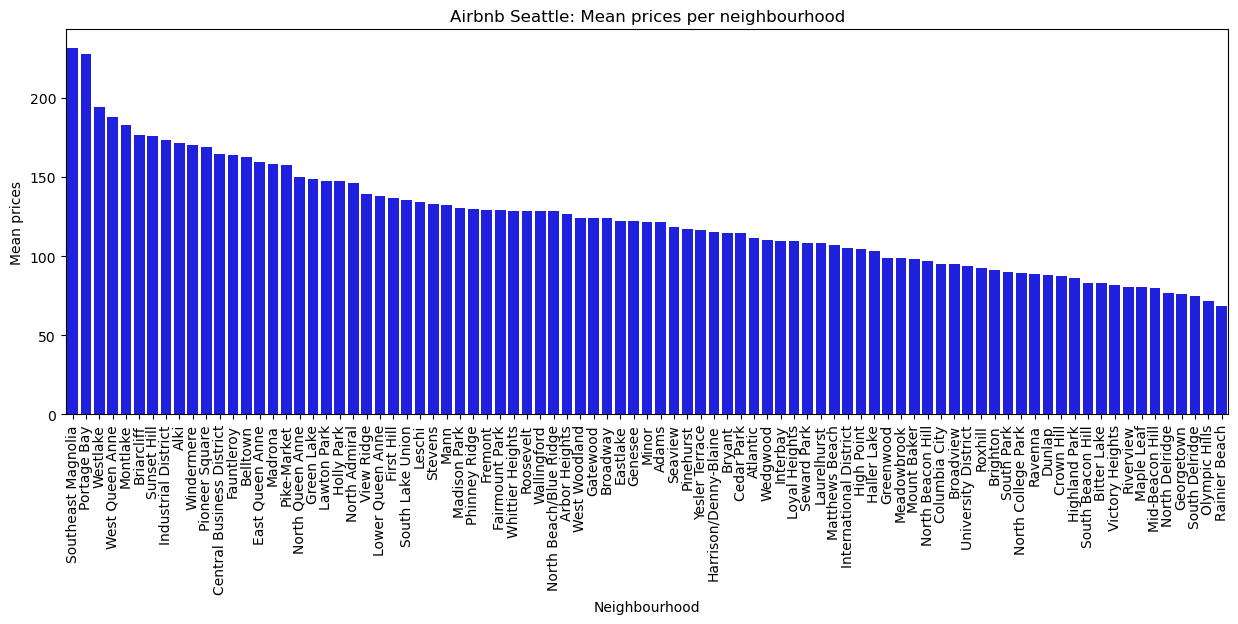

In [76]:
plt.figure(figsize=[15,5])
sns.barplot(data=df_neigh_mean_prices, x='neighbourhood_cleansed', y='price_value', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean prices')
plt.title('Airbnb Seattle: Mean prices per neighbourhood')
plt.savefig('mean_prices_per_neighbourhood.png', bbox_inches='tight');

##### Price per bed analysis

In this section, the price per bed ratio is introduced. This ratio reduces the price infomration to the core of the bed.

In [77]:
# based on cleaned df_bed dataframe, a new column with price per bed information is needed
df_bed['price_per_bed'] = df_bed['price_value'] / df_bed['beds']

In [78]:
# quick visual check
df_bed.sample(3)

,id,neighbourhood_cleansed,beds,currency,price_value,price_per_bed
2601,9580021,Broadway,1.0,$,85.0,85.0
3459,4163204,High Point,1.0,$,300.0,300.0
1236,9374358,Belltown,1.0,$,95.0,95.0


In [79]:
# create a new dataframe with mean prices per bed per neighbourhood
df_bed_mean = round(df_bed.groupby(by='neighbourhood_cleansed')['price_per_bed'].mean(),2).to_frame(name="mean_price")
df_bed_mean.sort_values(by='mean_price', ascending=False, inplace=True)
df_bed_mean

,mean_price
neighbourhood_cleansed,
Southeast Magnolia,136.27
Pioneer Square,119.99
South Lake Union,117.09
Central Business District,109.19
Lower Queen Anne,106.75
...,...
South Beacon Hill,54.08
Roxhill,50.83
Crown Hill,50.64


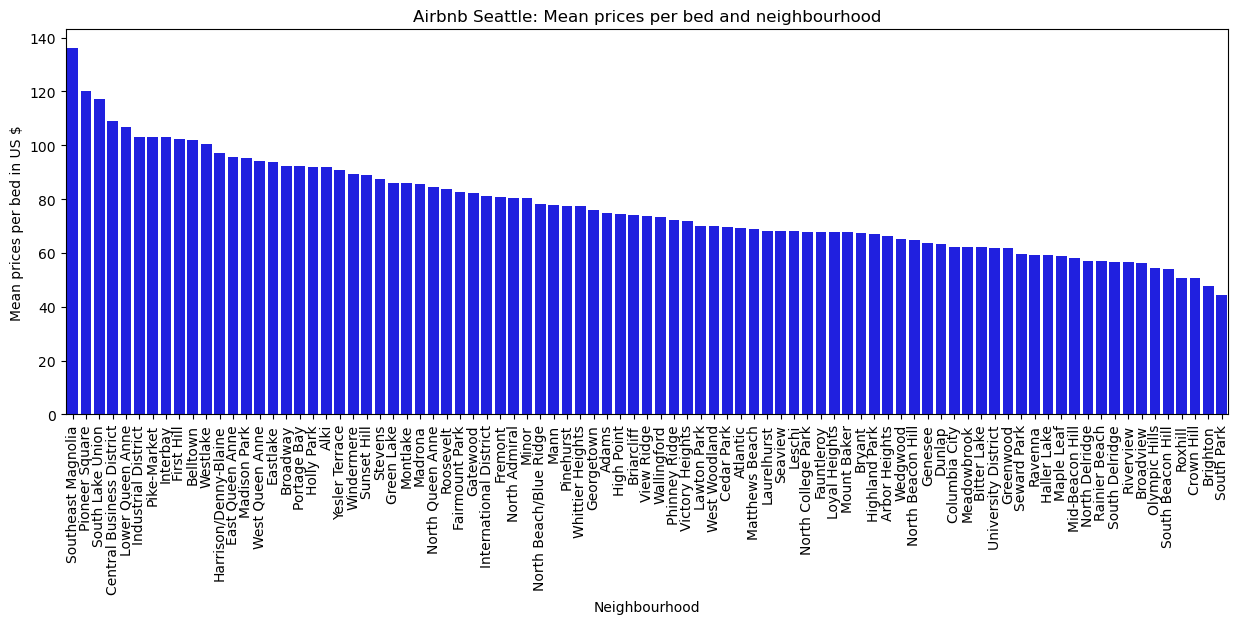

In [80]:
# create bar chart of neighbourhoods with marked top 5 in number
plt.figure(figsize=[15,5])
sns.barplot(data=df_bed_mean, x=df_bed_mean.index.values, y='mean_price', color = base_color)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean prices per bed in US $')
plt.title('Airbnb Seattle: Mean prices per bed and neighbourhood')
plt.savefig('mean_prices_per_bed_neighbourhood.png', bbox_inches='tight');

##### Pricing and availability

Here we bring pricing information an availability together. We use the price per bed ratio for comparison.

In [81]:
# setup list of prices of top 5 neighbourhoods in number of listings to mark in bar chart
lst_prices_number = df_bed_mean[df_bed_mean.index.isin(lst_top5_number_obj_neighs)]['mean_price'].tolist()
lst_prices_number

[102.13, 92.44, 80.79, 80.25, 73.34]

In [82]:
# set up a color palette to mark top 5 neighbourhoods in red bar color
cols_highl_number = ['red' if i in lst_prices_number else 'blue' for i in df_bed_mean['mean_price']]


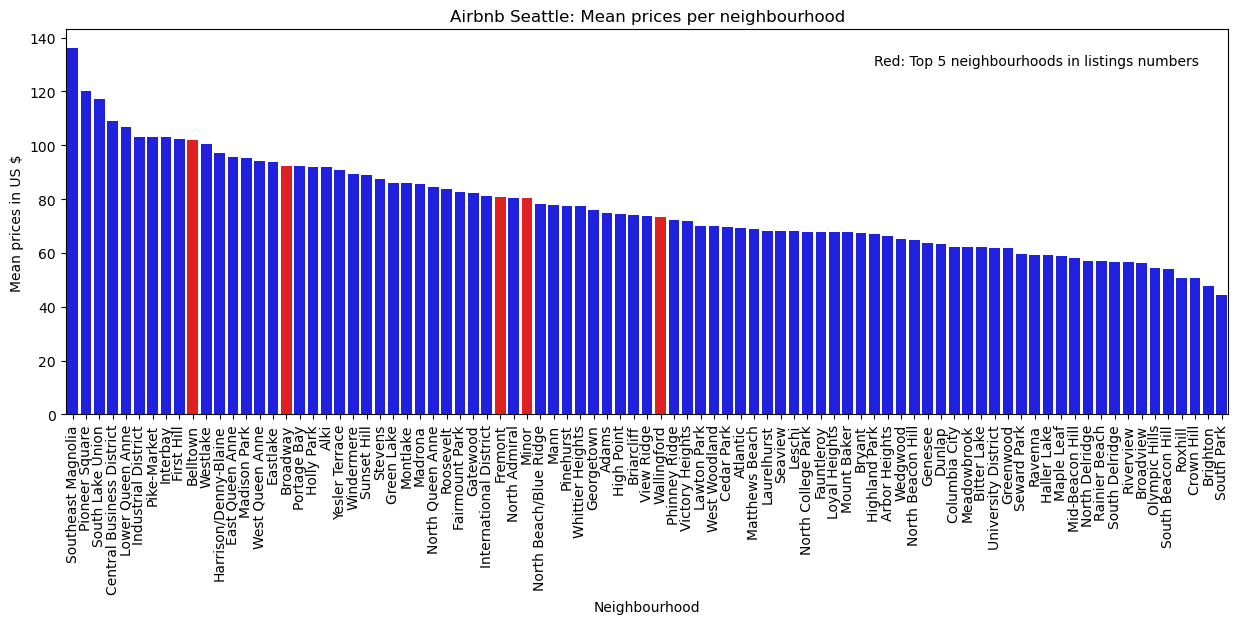

In [83]:
# create bar chart of neighbourhoods with marked top 5 in number
plt.figure(figsize=[15,5])
sns.barplot(data=df_bed_mean, x=df_bed_mean.index, y='mean_price', hue=df_bed_mean.index, palette=cols_highl_number)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean prices in US $')
plt.text(60,130,'Red: Top 5 neighbourhoods in listings numbers')
plt.title('Airbnb Seattle: Mean prices per neighbourhood')
plt.savefig('mean_prices_top5_listings_marked.png', bbox_inches='tight');

In [84]:
# setup list of prices of top 5 neighbourhoods in availability ratrio to mark in bar chart
lst_prices_avail = df_bed_mean[df_bed_mean.index.isin(lst_top5_neigh_avail)]['mean_price'].tolist()
lst_prices_avail

[92.03, 74.42, 74.05, 67.0, 50.83]

In [85]:
# set up a color palette to mark top 5 neighbourhoods in red bar color
cols_highl_avail = ['red' if i in lst_prices_avail else 'blue' for i in df_bed_mean['mean_price']]

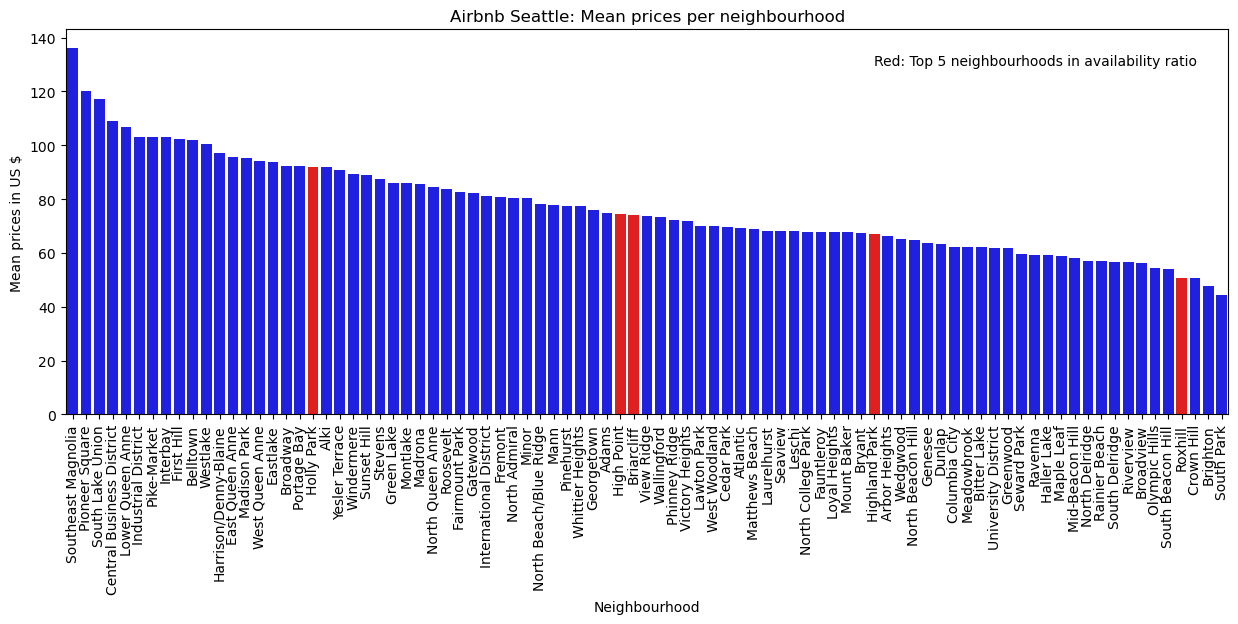

In [86]:
# create bar chart of neighbourhoods with marked top 5 in number
plt.figure(figsize=[15,5])
sns.barplot(data=df_bed_mean, x=df_bed_mean.index, y='mean_price', hue=df_bed_mean.index, palette=cols_highl_avail)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean prices in US $')
plt.text(60,130,'Red: Top 5 neighbourhoods in availability ratio')
plt.title('Airbnb Seattle: Mean prices per neighbourhood')
plt.savefig('mean_prices_top5_avail_marked.png', bbox_inches='tight');

#### 4.3 Amenities in high / low price scenarios

Using the extracted amenities and the top 5 / low 5 districts, a ranking for amenities frequency is set up

In [87]:
# set number of top / low price per bed neighbourhood
thresh_neigh = 5

In [88]:
# create list of neighbourhood names for selection in amenities dataframe cleaned above
lst_high_price = df_bed_mean[:thresh_neigh].index.tolist()
lst_low_price = df_bed_mean[-thresh_neigh:].index.tolist()

In [89]:
lst_low_price

['South Beacon Hill', 'Roxhill', 'Crown Hill', 'Brighton', 'South Park']

In [90]:
lst_high_price

['Southeast Magnolia',
 'Pioneer Square',
 'South Lake Union',
 'Central Business District',
 'Lower Queen Anne']

In [91]:
# filter neighbourhoods in amenities dataframe
df_high_end = df_amen_neigh[df_amen_neigh['neighbourhood_cleansed'].isin(lst_high_price)]
df_low_end = df_amen_neigh[df_amen_neigh['neighbourhood_cleansed'].isin(lst_low_price)]

In [92]:
# sum up all amenities, sort and create a percentage of amenities of listings of focus neighbourhoods
df_high_stats = df_high_end.drop(['id','neighbourhood_cleansed'], axis=1).sum().sort_values(ascending=False).to_frame(name="amen_counts")
df_high_stats['percentage'] = round(df_high_stats['amen_counts'] / len(df_high_end.index)*100,2)

In [93]:
df_high_stats

,amen_counts,percentage
Kitchen,254,96.21
Wireless Internet,251,95.08
Heating,245,92.80
Essentials,232,87.88
Washer,226,85.61
Dryer,226,85.61
Smoke Detector,221,83.71
TV,206,78.03
Internet,202,76.52
Shampoo,191,72.35


In [94]:
# sum up all amenities, sort and create a percentage of amenities of listings of focus neighbourhoods
df_low_stats = df_low_end.drop(['id','neighbourhood_cleansed'], axis=1).sum().sort_values(ascending=False).to_frame(name="amen_counts")
df_low_stats['percentage'] = round(df_low_stats['amen_counts'] / len(df_low_end.index)*100,2)

In [95]:
df_low_stats

,amen_counts,percentage
Wireless Internet,43,100.00
Heating,41,95.35
Smoke Detector,40,93.02
Kitchen,38,88.37
Free Parking on Premises,38,88.37
TV,35,81.40
Internet,35,81.40
Essentials,35,81.40
Washer,34,79.07
Dryer,33,76.74


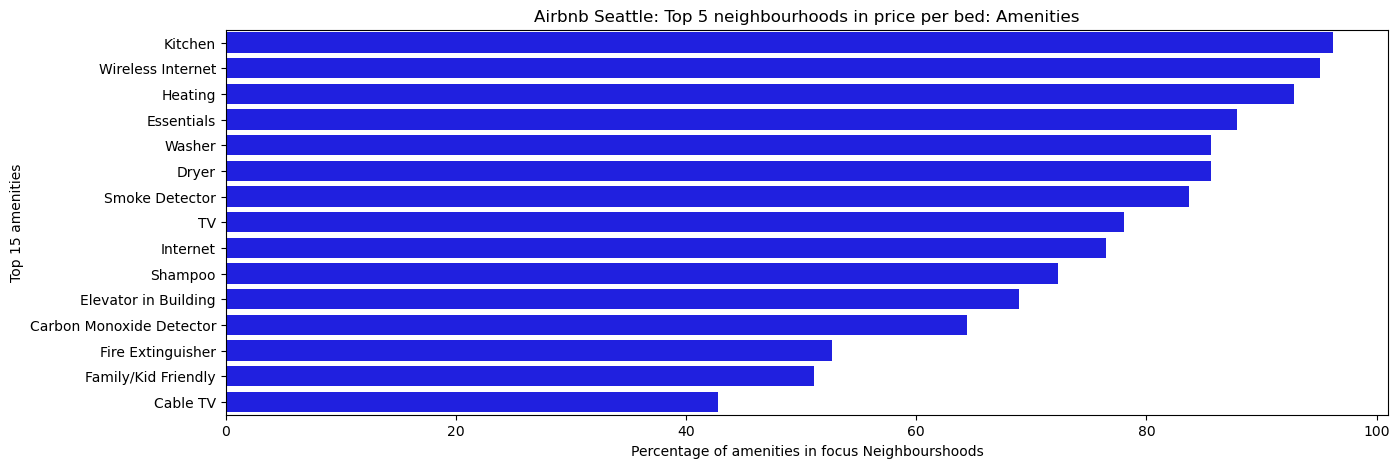

In [96]:
# create bar chart of neighbourhoods with marked top 5 in number
plt.figure(figsize=[15,5])
sns.barplot(data=df_high_stats.head(15), x='percentage', y=df_high_stats.index.values[:15], color=base_color)
plt.xlabel('Percentage of amenities in focus Neighbourshoods')
plt.ylabel('Top 15 amenities')
plt.title('Airbnb Seattle: Top 5 neighbourhoods in price per bed: Amenities')
plt.savefig('amenities_top15_high_price_neigh.png', bbox_inches='tight');

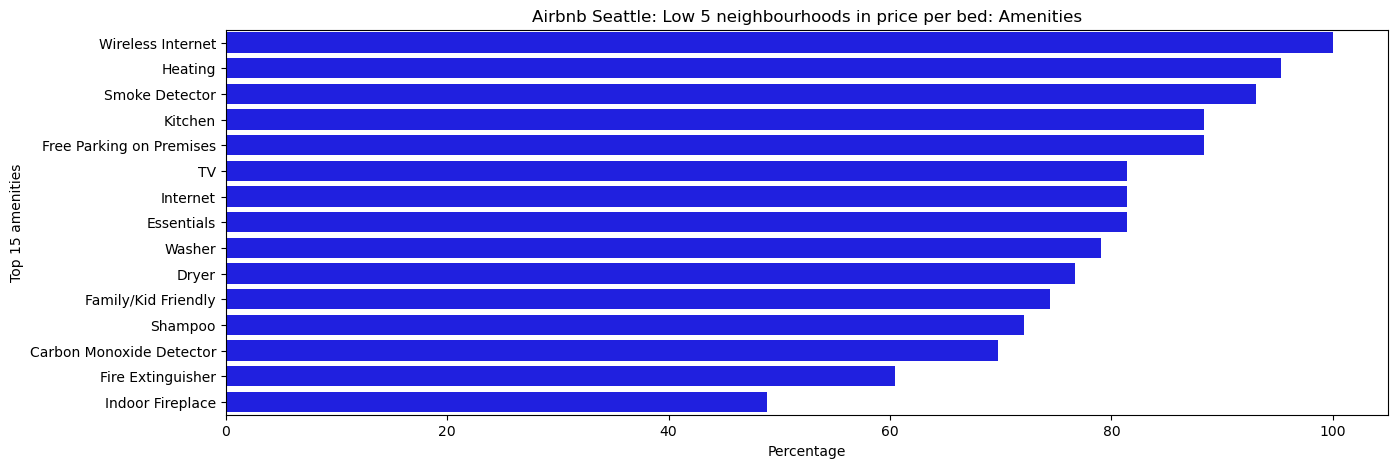

In [97]:
# create bar chart of neighbourhoods with marked top 5 in number
plt.figure(figsize=[15,5])
sns.barplot(data=df_low_stats.head(15), x='percentage', y=df_low_stats.index.values[:15], color=base_color)
plt.xlabel('Percentage')
plt.ylabel('Top 15 amenities')
plt.title('Airbnb Seattle: Low 5 neighbourhoods in price per bed: Amenities')
plt.savefig('amenities_top15_low_price_neigh.png', bbox_inches='tight');